In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptez-DS-Batch20/main/datasets/uspopulation.csv",index_col = 'DATE',parse_dates = True)

In [9]:
df.tail(10)

,PopEst
DATE,
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893
2018-10-01,328077
2018-11-01,328241


In [10]:
df.shape

(96, 1)

<Axes: xlabel='DATE'>

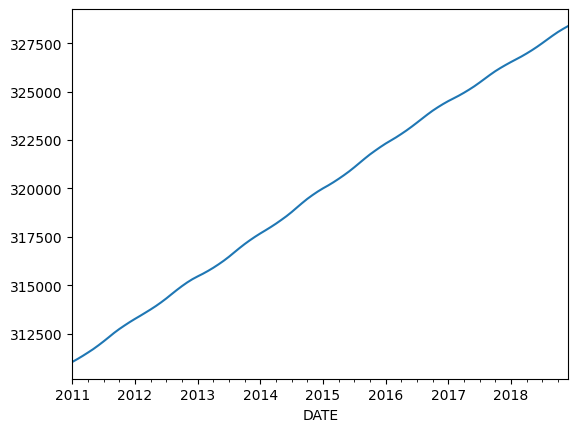

In [6]:
#HW
#Stationary analysis - Test..
df['PopEst'].plot()

In [11]:
train = df.iloc[:84]
test = df.iloc[84:]

In [29]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [15]:
from statsmodels.tsa.ar_model import AutoReg

In [13]:
import statsmodels.api as sm


In [24]:
model = AutoReg(train['PopEst'],lags = [1, 11, 12])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [25]:
AR1fit = model.fit()

In [26]:
AR1fit.params

const         303.874871
PopEst.L1       0.999972
PopEst.L11      0.797653
PopEst.L12     -0.798471
dtype: float64

In [28]:
predictions1 = AR1fit.predict(start = len(train)+1, end = len(train)+len(test)-1,dynamic = False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


<Axes: xlabel='DATE'>

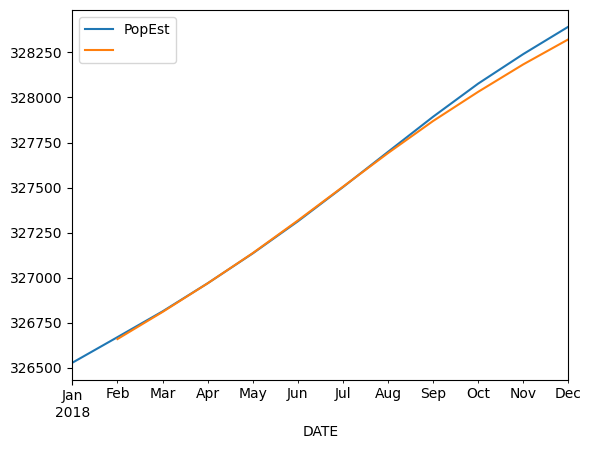

In [30]:
test['PopEst'].plot(legend = True)
predictions1.plot(legend = True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


<Axes: xlabel='DATE'>

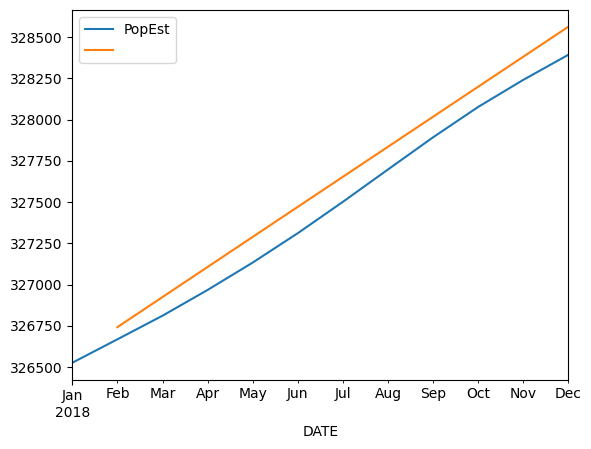

In [31]:
model = AutoReg(train['PopEst'],lags = [1])
AR1fit = model.fit()
predictions2 = AR1fit.predict(start = len(train)+1, end = len(train)+len(test)-1,dynamic = False)
test['PopEst'].plot(legend = True)
predictions2.plot(legend = True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


<Axes: xlabel='DATE'>

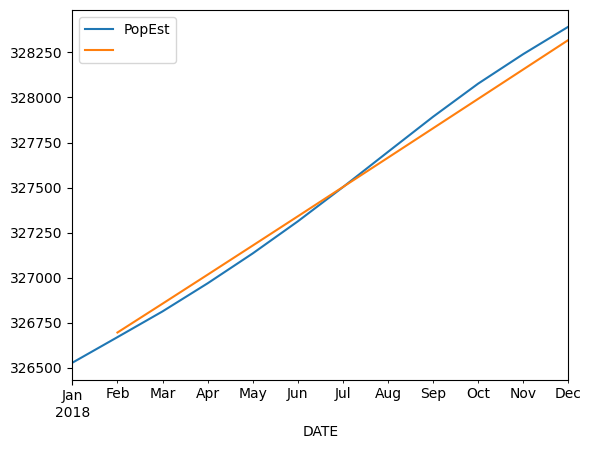

In [36]:
model = AutoReg(train['PopEst'],lags = list(range(1,3)))
AR1fit = model.fit()
predictions2 = AR1fit.predict(start = len(train)+1, end = len(train)+len(test)-1,dynamic = False)
test['PopEst'].plot(legend = True)
predictions2.plot(legend = True)